# Pandas and Matplotlib in 30 seconds or less

In this notebook, we will learn how to use pandas to load and manipulate some simple data, and use matplotlib to visualize the contents of a CSV file.

## Libraries

- **Pandas**: A software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. Note that this is always imported as `pd`.
- **Matplotlib**: A plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK. Note that we actually want to import `matplotlib.pyplot` and this is always imported as `plt`.


## Introduction to Pandas

Pandas is a powerful data manipulation library in Python that provides data structures and functions needed to manipulate and analyze structured data. It's built on top of two core Python libraries - Matplotlib for data visualization and NumPy for mathematical operations.

Pandas introduces two useful (and powerful) structures to Python - Series and DataFrame, both of which are built on top of NumPy.

A **Series** is a one-dimensional object similar to an array, list, or column in a table. It assigns a labeled index to each item in the list.

A **DataFrame** is a two-dimensional object similar to a spreadsheet or an SQL table. This is the most commonly used pandas object. You can think of a DataFrame as a group of Series that share an index (the column names).

With pandas, you can do things like:

- Easily read and write from and to CSV files, or even databases
- Handle missing data representation
- Convert data formats
- Perform database operations like merge, join, group, sort, etc.
- It's also incredibly fast, as it's built on top of NumPy

In this tutorial, we use pandas to load the Iris dataset into a DataFrame for use with the Scikit-learn library.

I, personally, hate Pandas, but there is literally no alternative.

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pandas

## Reading a CSV File using Pandas
CSV stands for comma separate value. A CSV file is a way of writing down the _contents_ of a spreadsheet in a way that can be read in any language.


Now that we have a CSV file, we can read it using pandas. The `read_csv` function in pandas is used to read CSV file into a new `DataFrame`. Sadly, all dataframes are called `df`. Always give your variables good names. Quick, give me a high level description of the contents of `df`. Now do it again after not having looked at this notebook in six months.

Once we have our dataframe, we will call the `head`, `info` and `describe` functions to make sure data has the right shape and looks reasonable statistically. `info` actually prints, rather than returns.

You can get the column names using the `columns` property. (There are also `tail` and `sample` functions similar to the `head` function.)

Notice that jupyter returns (and prints) the last command in a cell. We want to see the head, so we must print it. Since describe() is last, it will print automatically.


In [3]:
# Reading CSV file
df = pd.read_csv('samples.csv')
print("head\n", df.head())
print("\n\ninfo\n")
df.info()
print("\n\ncolumns\n", df.columns)
print("\n\ndescribe")
df.describe()

head
     normal1   normal2       exp      sine     fruit
0 -1.637148  0.621395  2.874107  0.000000   oranges
1 -0.542943 -0.975078  0.005535  0.010000    apples
2  1.329682 -1.222578  0.918255  0.019999  cherries
3 -0.710120 -0.645409  1.383994  0.029996   oranges
4  0.530270  1.634574  0.324804  0.039989    apples


info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   normal1  1000 non-null   float64
 1   normal2  1000 non-null   float64
 2   exp      1000 non-null   float64
 3   sine     1000 non-null   float64
 4   fruit    1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


columns
 Index(['normal1', 'normal2', 'exp', 'sine', 'fruit'], dtype='object')


describe


,normal1,normal2,exp,sine
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.025651,-0.009254,0.993983,0.184178
std,0.983884,1.023084,0.966519,0.665996
min,-3.449276,-3.026326,0.004068,-0.999997
25%,-0.675211,-0.711938,0.302249,-0.392818
50%,-0.011417,0.037453,0.679788,0.315322
75%,0.629651,0.678226,1.386148,0.810665
max,3.462140,2.767798,6.688404,1.000000


## Manipulating the data

In this section we we will select subsets of the data, as well as sort, group and transform it.

### Selecting subsets of the data

In this section we will select rows of the data by index and by value, as well as columns. Note that these methods use `[]` like arrays and dictionaries, not `()` like functions.

  * We can select columns by name or by a list of names. We can select rows with array indexing
  * Next can select rows with certain values using `loc`. Note that the geniuses who wrote pandas decided to use the c-style bitwise `&` and `|` operators to mean `and` and `or`. (They had a reason but it was still very much the wrong call). Note that it gives me the values _and_ their indices.

In [7]:
print(df["sine"].head())
print(df[["normal1","normal2","exp"]].head())
df["fruit"][5:11]

0    0.000000
1    0.010000
2    0.019999
3    0.029996
4    0.039989
Name: sine, dtype: float64
    normal1   normal2       exp
0 -1.637148  0.621395  2.874107
1 -0.542943 -0.975078  0.005535
2  1.329682 -1.222578  0.918255
3 -0.710120 -0.645409  1.383994
4  0.530270  1.634574  0.324804


5     cherries
6     cherries
7      oranges
8      oranges
9     cherries
10     peaches
Name: fruit, dtype: object

In [8]:
print(df.loc[df["fruit"] == "cherries"]["fruit"].count())
df.loc[(df["normal1"] >= .99) & (df["normal1"] <= 1.01)] 

335


,normal1,normal2,exp,sine,fruit
179,0.993422,0.068827,1.327269,0.976071,oranges
447,1.005740,0.468363,0.624628,-0.970767,peaches
596,1.004507,0.104015,2.891635,-0.317589,peaches
741,0.995188,0.486364,0.567768,0.903049,oranges
883,0.993624,-1.497276,0.359597,0.560325,cherries
905,1.001445,-0.490941,3.606197,0.366066,oranges


### Sorting, grouping and transforming the data

In this selection, we describe how to sort, group / aggregate and transform the data.

  * We can sort using the `sort_values` function
  * Aggregation is achieved with `groupby`. This is more complicated than this example makes it appear, but you can get really far w/out running into anything complicated
  * Finally we demonstrate creating a new column from an existing column using the map function. Note that map takes a _function_ not a function _call_

In [9]:
print(df.sort_values("sine").head())
print("\n")
print(df.sort_values(["fruit", "sine"]).head())

      normal1   normal2       exp      sine     fruit
471 -0.273359  0.411388  1.982302 -0.999997  cherries
472 -0.285365 -0.031439  0.220481 -0.999971   peaches
470 -0.028242  0.454018  0.808284 -0.999923  cherries
473  0.071842  0.426429  2.987934 -0.999845   peaches
469 -0.311356 -0.060905  0.045217 -0.999749  cherries


      normal1   normal2       exp      sine   fruit
463 -0.450020  0.226109  2.072642 -0.996608  apples
481  0.984480  2.623265  0.817905 -0.995240  apples
457 -0.323609  0.286916  0.811503 -0.989880  apples
454 -0.896439 -1.035436  1.326948 -0.985178  apples
451 -1.294338  1.274467  0.778557 -0.979589  apples


In [10]:
grouped = df.groupby('fruit').mean()
grouped

,normal1,normal2,exp,sine
fruit,,,,
apples,0.043234,0.037869,0.976870,0.167639
bananas,-0.148203,-0.035493,0.983007,0.142957
cherries,-0.010199,-0.059418,0.998099,0.185429
oranges,-0.035673,0.105044,1.001806,0.218968
peaches,-0.016798,-0.052773,0.995024,0.178835


In [11]:
df['range'] = df['sine'].map(np.arcsin)
df.head()

,normal1,normal2,exp,sine,fruit,range
0,-1.637148,0.621395,2.874107,0.000000,oranges,0.00
1,-0.542943,-0.975078,0.005535,0.010000,apples,0.01
2,1.329682,-1.222578,0.918255,0.019999,cherries,0.02
3,-0.710120,-0.645409,1.383994,0.029996,oranges,0.03
4,0.530270,1.634574,0.324804,0.039989,apples,0.04


## Visualizing the data

In this section we will use `matplotlib` to demonstrate some simple plots and charts

### Creating a Line Plot

The first thing we are going to do is draw a simple line plot of our sine curve. Notice that we have to call plt.show() to render the plot. If we didn't, since Jupyter prints the last thing returned, we would still get the plot, but also additional information we don't want.


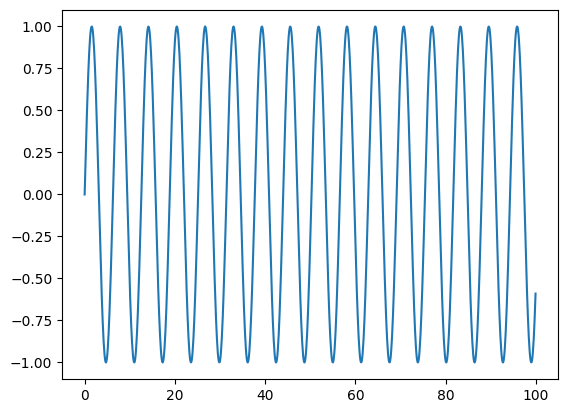

In [12]:
series = np.arange(0, 100, 0.1)
plt.plot(series, np.sin(series))
#plt.show()

### Creating a Scatterplot

Next we will create a scatter plot to visualize the relationship between two random variables. We do not expect to see much correlation between a normal and an exponential curve, but we whould see a lot of correlation between two normal curves.

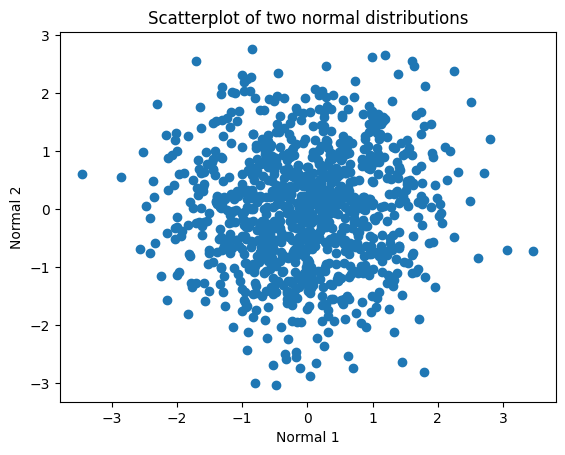

In [13]:
# Creating a scatterplot
plt.scatter(df['normal1'], df['normal2'])
plt.title('Scatterplot of two normal distributions')
plt.xlabel('Normal 1')
plt.ylabel('Normal 2')
plt.show()

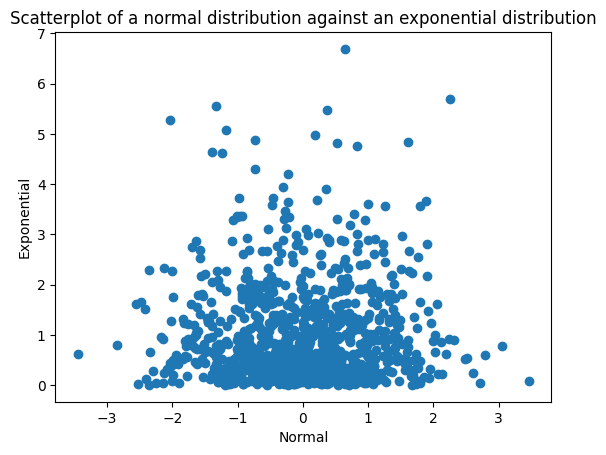

In [14]:
# Creating a scatterplot
plt.scatter(df['normal1'], df['exp'])
plt.title('Scatterplot of a normal distribution against an exponential distribution')
plt.xlabel('Normal')
plt.ylabel('Exponential')
plt.show()

### Histograms

Next we will create some simple histograms to visualize our curves and make sure they look like the distribution they were sampled from.

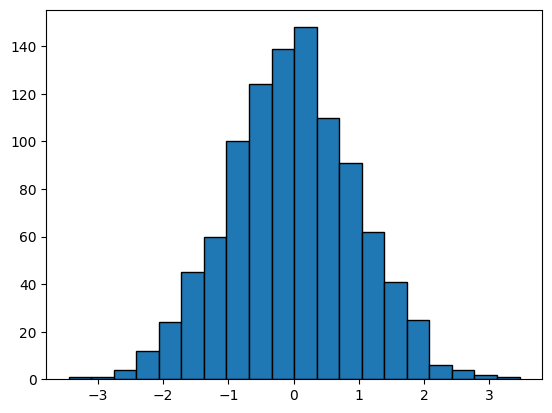

In [15]:
plt.hist(df['normal1'], bins=20, edgecolor="black")
plt.show()

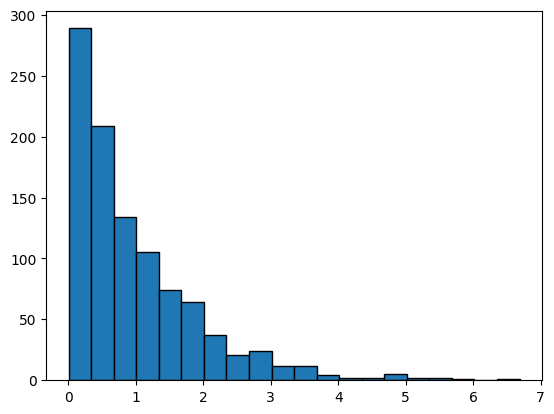

In [16]:
plt.hist(df['exp'], bins=20, edgecolor="black")
plt.show()

### Charts

We can also use matplotlib to create simple charts. Note that in this example I am creating subplots. 

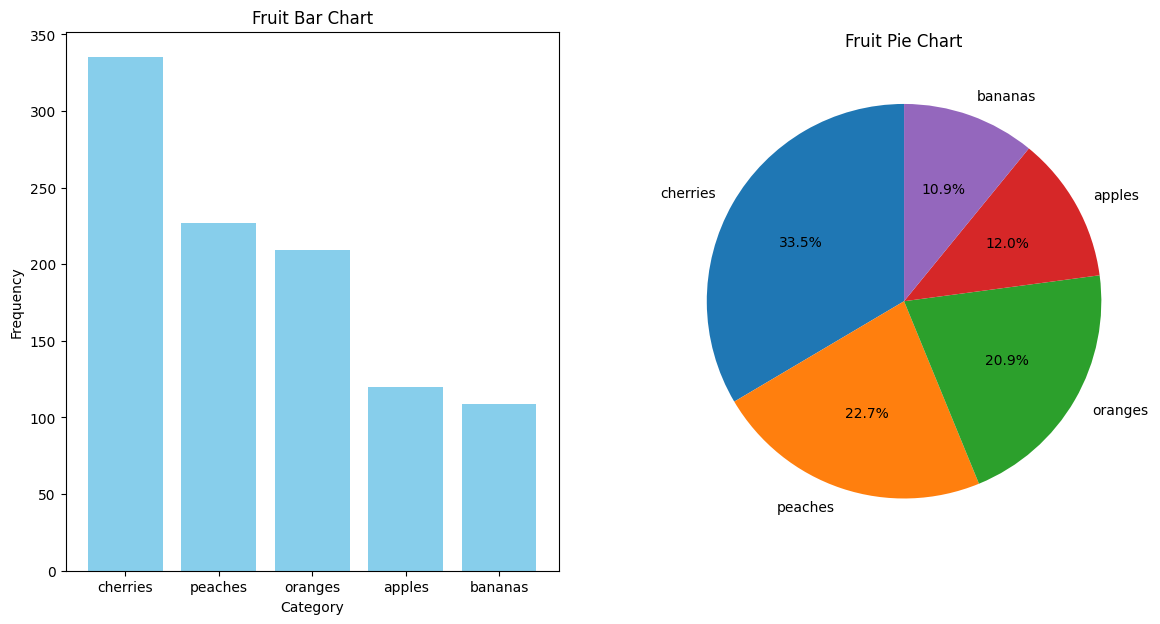

In [17]:
_, axs = plt.subplots(1, 2, figsize=(14, 7))

fruit_counts = df["fruit"].value_counts()
# Bar chart
axs[0].bar(fruit_counts.index, fruit_counts.values, color='skyblue')
axs[0].set_title('Fruit Bar Chart')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Frequency')

# Pie chart
axs[1].pie(fruit_counts.values, labels=fruit_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Fruit Pie Chart')

plt.show()